# Titanic survival prediction project

## We need to build a model to predict the passenger is survived or not based on the given data set.

Importing all the Libraries

In [500]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

Reading the data set

In [501]:
titanic_data=pd.read_csv('C:/Users/yn/Desktop/Yuvi/DataTrained/PracticeProjets/titanic_train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [502]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [503]:
titanic_data.shape

(891, 12)

We have 891 rows and 12 columns

will drop the column 'Name' and 'PassengerId', 'Ticket' as it is not significant data to build our model.

In [504]:
titanic_data.drop(['Name','PassengerId','Ticket'],axis=1,inplace=True)

### Exploratory Data Analysis

In [505]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


1. Around 38% of passengers are managed to survive.
2. We have missing value in Age.
3. People from Age 0.4 to 80 are travelled in the ship.
4. Seems like Fare is having outliers as we have minimum 'Fare' as 0.

In [506]:
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

There are 549 passengers are died and 342 are survived.

In [507]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

There are 577 male passengers and 314 female passengers travelled in the ship.

In [508]:
titanic_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

There are 3 classes and more people travelled in class 3 than class 2 and 1.

In [509]:
titanic_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

There are 3 stations and majority of the people on boarded in the station S.

#### Finding and filling missing values

In [510]:
titanic_data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

As we have more than 50% values are missing, we will drop cabin column.

In [511]:
titanic_data.drop(['Cabin'],axis=1,inplace=True)

In [512]:
from sklearn.impute import SimpleImputer
sim_imp=SimpleImputer(strategy='mean')
sim_imp=sim_imp.fit(titanic_data[['Age']])
titanic_data['Age']=sim_imp.transform(titanic_data[['Age']])

In [513]:
sim_imp=SimpleImputer(strategy='most_frequent')
sim_imp=sim_imp.fit(titanic_data[['Embarked']])
titanic_data['Embarked']=sim_imp.transform(titanic_data[['Embarked']])

In [514]:
titanic_data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [515]:
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


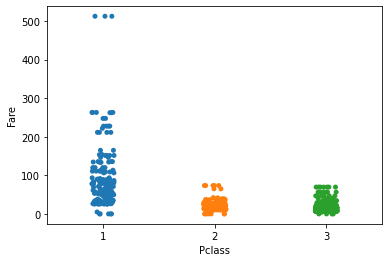

In [516]:
sns.stripplot(x='Pclass',y='Fare',data=titanic_data)
plt.show()

1. Pclass 2 and 3 ticket fare is within 100.
2. Pclass 1 ticket Fares are costlier than class 2 and class 3.

<Figure size 720x576 with 0 Axes>

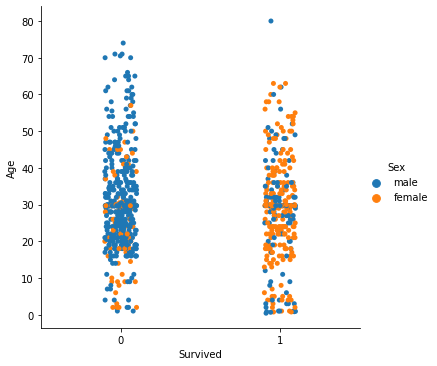

In [517]:
plt.figure(figsize=(10,8))
sns.catplot(x='Survived',y='Age',hue='Sex',data=titanic_data)
plt.show()

<Figure size 720x576 with 0 Axes>

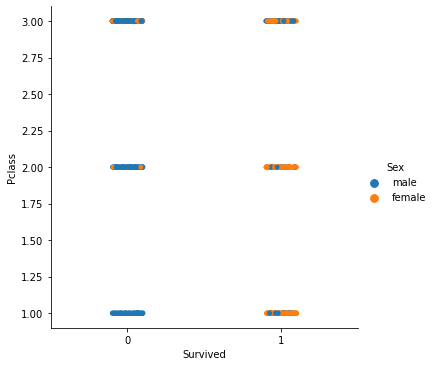

In [518]:
plt.figure(figsize=(10,8))
sns.catplot(x='Survived',y='Pclass',hue='Sex',data=titanic_data)
plt.show()

1. More female passengers from all the classes are survied high.
2. Class 1 and Class 2 Female passengers are having high survived rate than class 3 female passengers.

<Figure size 288x288 with 0 Axes>

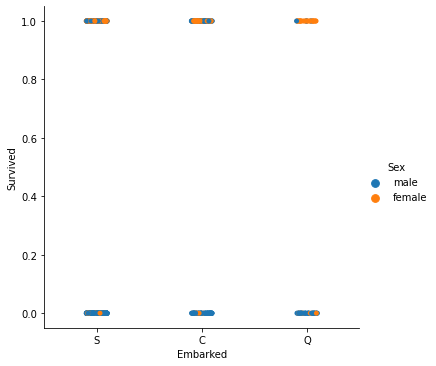

In [519]:
plt.figure(figsize=(4,4))
sns.catplot(x='Embarked',y='Survived',hue='Sex',data=titanic_data)
plt.show()

0    549
1    342
Name: Survived, dtype: int64


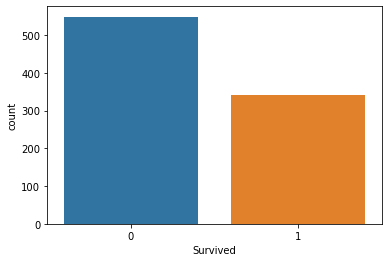

In [520]:
print(titanic_data['Survived'].value_counts())
plt.figure(figsize=(6,4))
sns.countplot(titanic_data['Survived'])
plt.show()

3    491
1    216
2    184
Name: Pclass, dtype: int64


<Figure size 1296x1152 with 0 Axes>

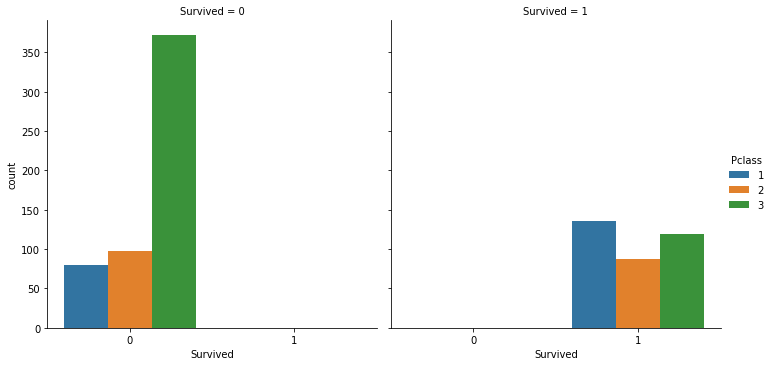

male      577
female    314
Name: Sex, dtype: int64


<Figure size 1296x1152 with 0 Axes>

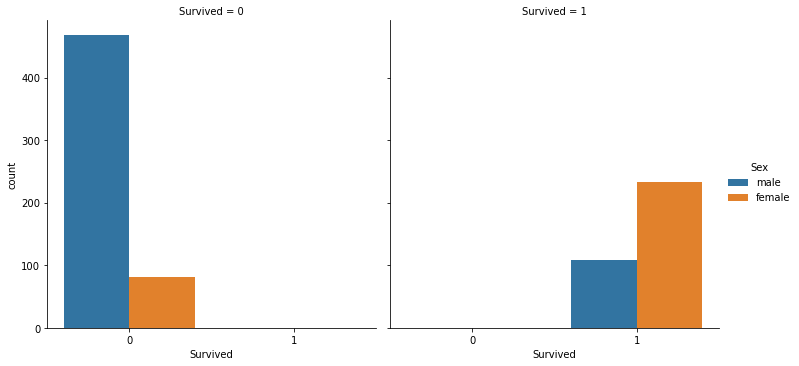

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


<Figure size 1296x1152 with 0 Axes>

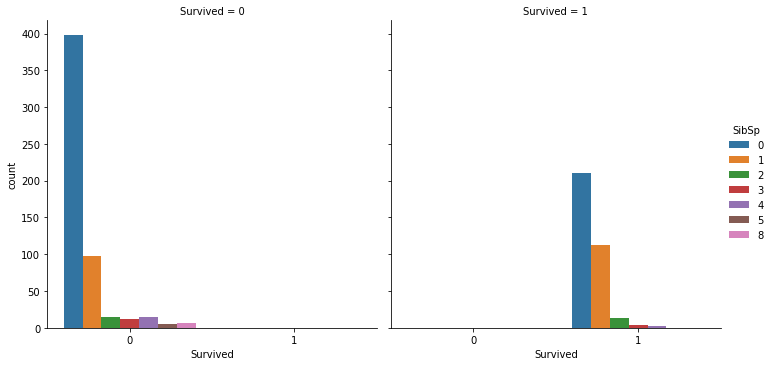

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64


<Figure size 1296x1152 with 0 Axes>

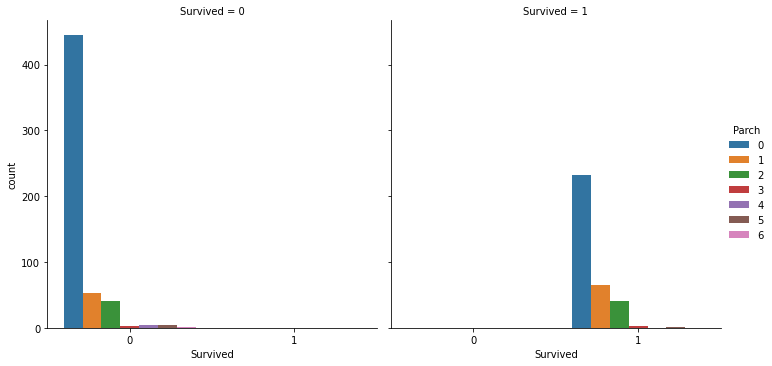

S    646
C    168
Q     77
Name: Embarked, dtype: int64


<Figure size 1296x1152 with 0 Axes>

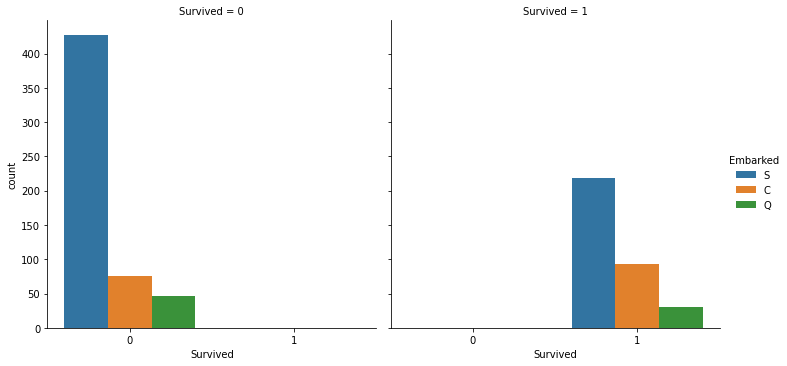

In [521]:
catg_columns=['Pclass','Sex','SibSp','Parch','Embarked']
for col in catg_columns:
    print(titanic_data[col].value_counts())
    plt.figure(figsize=(18,16))
    sns.catplot(x='Survived',hue=col,col='Survived',data=titanic_data,kind='count')
    plt.show()

Observations:
1. More people died from Pclass 3.
2. More Female passengers are survived than male passengers.
3. Passengers Embarked at 'S' are more than others.

In [522]:
from sklearn.preprocessing import LabelEncoder
#titanic_dummies=pd.get_dummies(titanic_data,columns=['Sex','Embarked'],)
#titanic_dummies

titanic_data['Sex']=LabelEncoder().fit_transform(titanic_data['Sex'])
titanic_data['Embarked']=LabelEncoder().fit_transform(titanic_data['Embarked'])

#### Finding correlation between the features

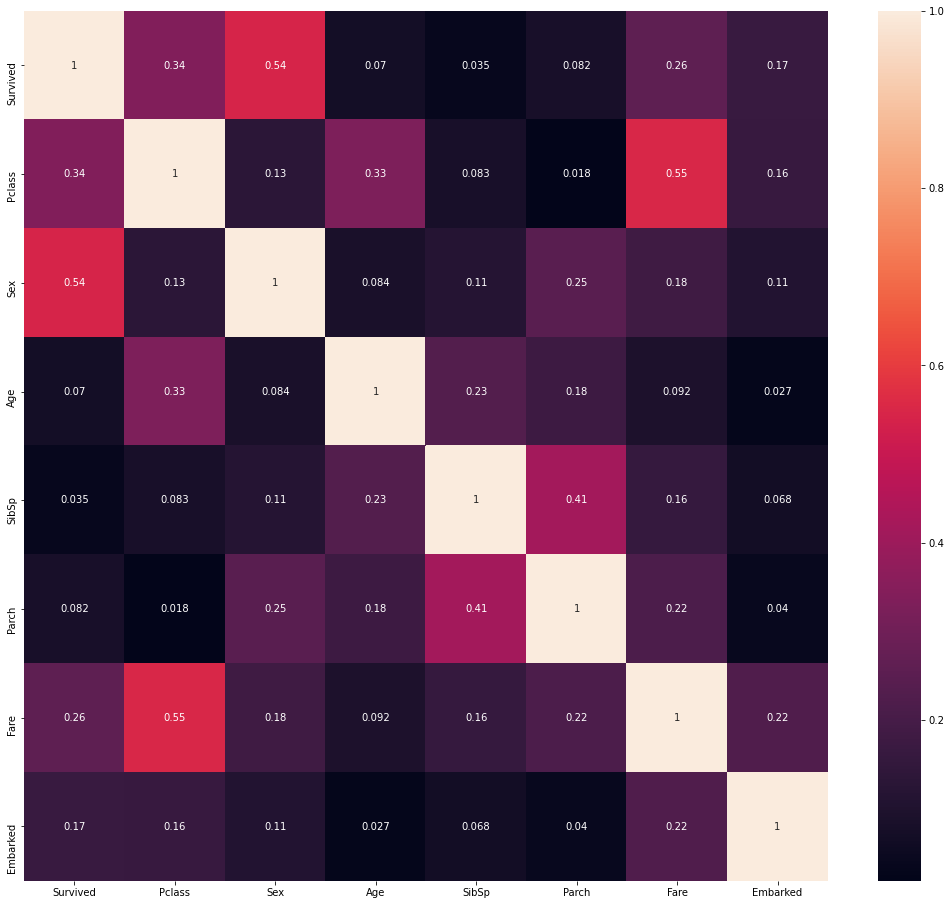

In [523]:
plt.figure(figsize=(18,16))
sns.heatmap(titanic_data.corr().abs(),annot=True)
plt.show()

1. There is no strong correlation between the feature variables.
2. Pclass is 55% correlated with Fare.
3. Feature Sex is contributing 54% to predict the target survived.

In [524]:
titanic_data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


1. Age and Fare are continous data and all other features are categrical data.
2. Seems like we have outliers in 'Fare'.

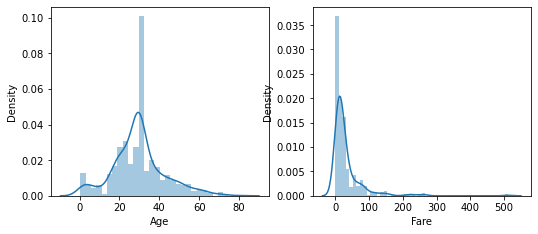

In [525]:
continous_col=['Age','Fare']
plt.figure(figsize=(18,16))
pltno=1
for col in continous_col:
    ax=plt.subplot(4,4,pltno)
    sns.distplot(titanic_data[col])
    pltno+=1
plt.show()

1. Fare is having right skewed data.

In [526]:
titanic_data.skew().sort_values()

Embarked   -1.264823
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
Survived    0.478523
Parch       2.749117
SibSp       3.695352
Fare        4.787317
dtype: float64

### Outliers prediction and removal using VIF

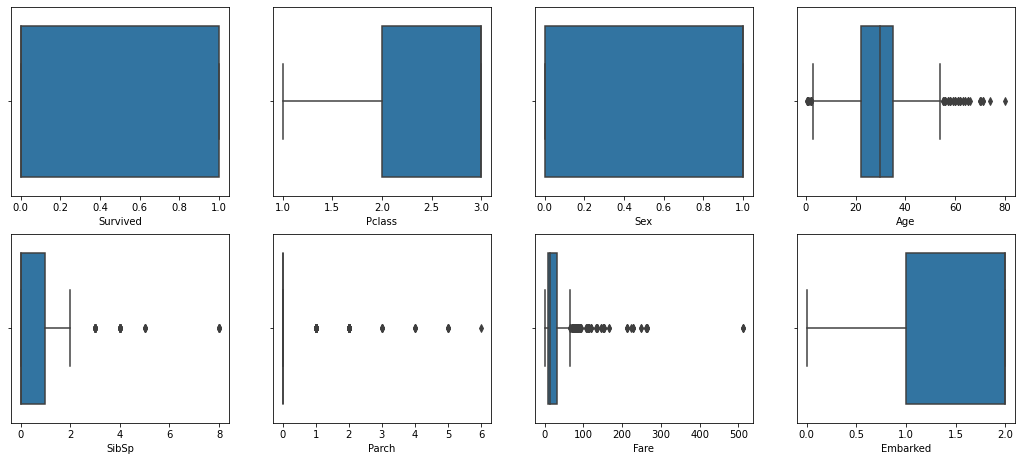

In [527]:
plt.figure(figsize=(18,16))
pltno=1
for col in titanic_data.columns:
    ax=plt.subplot(4,4,pltno)
    sns.boxplot(x=titanic_data[col])
    pltno+=1
plt.show()

Age and Fare are having outliers

In [528]:
q1=titanic_data.quantile(0.25)
q3=titanic_data.quantile(0.75)
iqr=q3-q1

In [529]:
Age_high=q3.Age+(1.5*iqr.Age)
index=np.where(titanic_data['Age']>Age_high)
titanic_data=titanic_data.drop(titanic_data.index[index])
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [530]:
Age_low=q1.Age-(1.5*iqr.Age)
index=np.where(titanic_data['Age']<Age_low)
titanic_data=titanic_data.drop(titanic_data.index[index])
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [531]:
fare_high=q3.Fare+(1.5*iqr.Fare)
index=np.where(titanic_data['Fare']>fare_high)
titanic_data=titanic_data.drop(titanic_data.index[index])
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
5,0,3,1,29.699118,0,0,8.4583,1
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


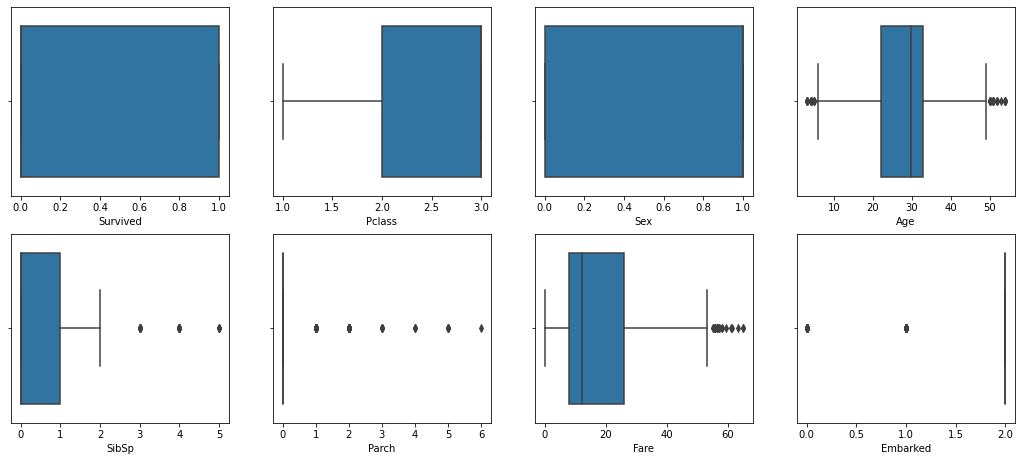

In [532]:
plt.figure(figsize=(18,16))
pltno=1
for col in titanic_data.columns:
    ax=plt.subplot(4,4,pltno)
    sns.boxplot(x=titanic_data[col])
    pltno+=1
plt.show()

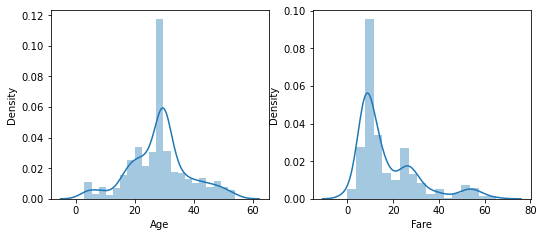

In [533]:
continous_col=['Age','Fare']
plt.figure(figsize=(18,16))
pltno=1
for col in continous_col:
    ax=plt.subplot(4,4,pltno)
    sns.distplot(titanic_data[col])
    pltno+=1
plt.show()

Now the data looks good and does not have skweness.

Spliting Features and target variable.

In [534]:
X=titanic_data.drop(['Survived'],axis=1)
y=titanic_data['Survived']

Scaling the data to standard scale

In [535]:
from sklearn.preprocessing import StandardScaler
X_sc=StandardScaler().fit_transform(X)

## Model Building

Importing the classfication algorithms

In [536]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_roc_curve
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler

Intializing all the models

In [537]:
log_reg=LogisticRegression()
dt_clf=DecisionTreeClassifier()
kn_clf=KNeighborsClassifier()
rf_clf=RandomForestClassifier()

#### Finding best random state to split the training and test set data using basic model

In [538]:
max_acc=0
best_Rs=0
for i in range(1,200):
    log_reg=LogisticRegression()
    X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.20,random_state=i)
    log_reg.fit(X_train,y_train)
    y_pred=log_reg.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    if(accuracy>max_acc):
        max_acc=accuracy
        best_Rs=i
print("Max accuracy is: ",max_acc,'Best RS: ',best_Rs)

Max accuracy is:  0.8827586206896552 Best RS:  123


##### Spliting the data to train and test sets using best random state

In [539]:
 X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.20,random_state=123)

### Buliding base models

In [540]:
model=[log_reg,dt_clf,kn_clf,rf_clf]
for m in model:
    m.fit(X_train,y_train)
    y_pred=m.predict(X_test)
    print('Metrics for ',m)
    print('Accuracy score: ',accuracy_score(y_test,y_pred))
    print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred))
    print('Classification Metrcis: \n',classification_report(y_test,y_pred),'\n')

Metrics for  LogisticRegression()
Accuracy score:  0.8827586206896552
Confusion Matrix: 
 [[96  8]
 [ 9 32]]
Classification Metrcis: 
               precision    recall  f1-score   support

           0       0.91      0.92      0.92       104
           1       0.80      0.78      0.79        41

    accuracy                           0.88       145
   macro avg       0.86      0.85      0.85       145
weighted avg       0.88      0.88      0.88       145
 

Metrics for  DecisionTreeClassifier()
Accuracy score:  0.8068965517241379
Confusion Matrix: 
 [[89 15]
 [13 28]]
Classification Metrcis: 
               precision    recall  f1-score   support

           0       0.87      0.86      0.86       104
           1       0.65      0.68      0.67        41

    accuracy                           0.81       145
   macro avg       0.76      0.77      0.77       145
weighted avg       0.81      0.81      0.81       145
 

Metrics for  KNeighborsClassifier()
Accuracy score:  0.8137931034482

### Cross validation

In [541]:
for m in model:   
    print("Cross val score for ",m,' ',cross_val_score(m,X_test,y_test).mean())

Cross val score for  LogisticRegression()   0.8620689655172413
Cross val score for  DecisionTreeClassifier()   0.8344827586206897
Cross val score for  KNeighborsClassifier()   0.8620689655172413
Cross val score for  RandomForestClassifier()   0.8344827586206897


### Ploting ROC AUC Curve

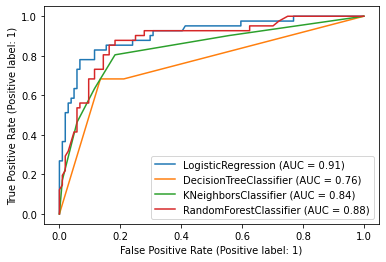

In [542]:
disp=plot_roc_curve(log_clf,X_test,y_test)
plot_roc_curve(dt_clf,X_test,y_test,ax=disp.ax_)
plot_roc_curve(kn_clf,X_test,y_test,ax=disp.ax_)
plot_roc_curve(rf_clf,X_test,y_test,ax=disp.ax_)
plt.show()

Logistic Regression has less false prediction, it has good cross_val_score than others and it covers the 91% of AUC.

Based on above metrics, LogisticRegression performs better than other models.

### HyperParameter Tuning

In [543]:
from sklearn.model_selection import GridSearchCV
param={'penalty':['l2','l1','elasticnet'],'C':[0.01,0.1,1,0.01],'max_iter':[60,70,80,100,120]}
grd_srch=GridSearchCV(LogisticRegression(),param,cv=5)
grd_srch.fit(X_train,y_train)
print(grd_srch.best_params_)
print(grd_srch.best_score_)

{'C': 0.1, 'max_iter': 60, 'penalty': 'l2'}
0.7673913043478262


### Final model

In [546]:
max_acc=0
best_rs=0
for i in range(10,200):
    log_reg=LogisticRegression(C=0.1,max_iter=60,penalty='l2',random_state=i)
    log_reg.fit(X_train,y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    if(acc>max_acc):
        max_acc=acc
        best_rs=i
print('Best Random state: ',best_rs,'\n','Best Accuracy: ',max_acc)
log_reg=LogisticRegression(C=0.1,max_iter=60,penalty='l2',random_state=best_rs)
log_reg.fit(X_train,y_train)
y_pred=log_reg.predict(X_test)
print('Accuracy score: ',accuracy_score(y_test,y_pred))
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred))
print('Classification report: \n',classification_report(y_test,y_pred))


Best Random state:  10 
 Best Accuracy:  0.8896551724137931
Accuracy score:  0.8896551724137931
Confusion Matrix: 
 [[97  7]
 [ 9 32]]
Classification report: 
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       104
           1       0.82      0.78      0.80        41

    accuracy                           0.89       145
   macro avg       0.87      0.86      0.86       145
weighted avg       0.89      0.89      0.89       145



Our model Performs well with 89% of Accuracy score.

## Saving model

Importing Pickle library

In [547]:
import pickle

Saving the model

In [548]:
pickle.dump(log_reg,open('C:/Users/yn/Desktop/Yuvi/DataTrained/Saved Models- Practice Projects/TitanicSurvivalPrediction.pkl','wb'))

Loading the saved model

In [549]:
final_model=pickle.load(open('C:/Users/yn/Desktop/Yuvi/DataTrained/Saved Models- Practice Projects/TitanicSurvivalPrediction.pkl','rb'))

Predicting again using loaded model

In [550]:
y_pred=final_model.predict(X_test)
result_set=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
result_set

,Actual,Predicted
206,0,0
67,0,0
723,0,0
680,0,1
706,1,1
...,...,...
807,0,1
864,0,0
855,1,1
216,1,1
